In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydataset
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
import wrangle
import sklearn.preprocessing
from wrangle import data_split, scale_data

In [2]:
df= wrangle.wrangle_zillow()

Using cached csv


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50477 entries, 14297519 to 13083743
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     50477 non-null  int64  
 1   bathrooms    50477 non-null  int64  
 2   square_feet  50477 non-null  int64  
 3   garage       50477 non-null  int64  
 4   pool         50477 non-null  int64  
 5   lot_size     50477 non-null  int64  
 6   zip          50477 non-null  int64  
 7   year_built   50477 non-null  int64  
 8   tax_value    50477 non-null  int64  
 9   tax_amount   50477 non-null  float64
 10  fed_code     50477 non-null  int64  
 11  age          50477 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 5.0 MB


In [4]:
train_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123)
print(train.shape, validate.shape, test.shape)

(28266, 12) (12115, 12) (10096, 12)


In [5]:
train.columns

Index(['bedrooms', 'bathrooms', 'square_feet', 'garage', 'pool', 'lot_size',
       'zip', 'year_built', 'tax_value', 'tax_amount', 'fed_code', 'age'],
      dtype='object')

In [6]:
train.head()

,bedrooms,bathrooms,square_feet,garage,pool,lot_size,zip,year_built,tax_value,tax_amount,fed_code,age
parcel,,,,,,,,,,,,
11038754,2,2,1217,0,0,7946,96371,1952,398737,4818.44,6037,65
13868645,3,2,1427,2,0,8132,97039,1963,183434,2333.40,6059,54
17278308,4,3,3472,2,0,15269,96351,1993,612977,6848.96,6111,24
12852432,3,2,1400,0,0,6652,96492,1974,241917,3254.93,6037,43
10729644,3,2,1167,0,1,7674,96342,1959,67256,929.64,6037,58



1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [7]:
# Col to scale:
cols_scaled = ['bedrooms', 'bathrooms', 'square_feet', 'tax_value', 'lot_size']

In [8]:
train_scaled = train.copy()
scaler = MinMaxScaler()
train_scaled[cols_scaled] = scaler.fit_transform(train[cols_scaled])

In [9]:
train_scaled

,bedrooms,bathrooms,square_feet,garage,pool,lot_size,zip,year_built,tax_value,tax_amount,fed_code,age
parcel,,,,,,,,,,,,
11038754,0.333333,0.333333,0.125842,0,0,0.001106,96371,1952,0.198441,4818.44,6037,65
13868645,0.500000,0.333333,0.150656,2,0,0.001133,97039,1963,0.090409,2333.40,6059,54
17278308,0.666667,0.500000,0.392296,2,0,0.002157,96351,1993,0.305941,6848.96,6111,24
12852432,0.500000,0.333333,0.147465,0,0,0.000920,96492,1974,0.119754,3254.93,6037,43
10729644,0.500000,0.333333,0.119934,0,1,0.001067,96342,1959,0.032114,929.64,6037,58
...,...,...,...,...,...,...,...,...,...,...,...,...
12746457,0.500000,0.166667,0.106345,0,0,0.000683,96193,1950,0.018081,886.29,6037,67
12720771,0.333333,0.166667,0.085076,0,0,0.000707,96193,1949,0.164119,8712.83,6037,68
11199404,0.666667,0.500000,0.141085,0,0,0.000610,97328,1988,0.098370,3397.59,6037,29


In [10]:
train

,bedrooms,bathrooms,square_feet,garage,pool,lot_size,zip,year_built,tax_value,tax_amount,fed_code,age
parcel,,,,,,,,,,,,
11038754,2,2,1217,0,0,7946,96371,1952,398737,4818.44,6037,65
13868645,3,2,1427,2,0,8132,97039,1963,183434,2333.40,6059,54
17278308,4,3,3472,2,0,15269,96351,1993,612977,6848.96,6111,24
12852432,3,2,1400,0,0,6652,96492,1974,241917,3254.93,6037,43
10729644,3,2,1167,0,1,7674,96342,1959,67256,929.64,6037,58
...,...,...,...,...,...,...,...,...,...,...,...,...
12746457,3,1,1052,0,0,5000,96193,1950,39289,886.29,6037,67
12720771,2,1,872,0,0,5164,96193,1949,330334,8712.83,6037,68
11199404,4,3,1346,0,0,4491,97328,1988,199300,3397.59,6037,29


Text(0, 0.5, 'Count')

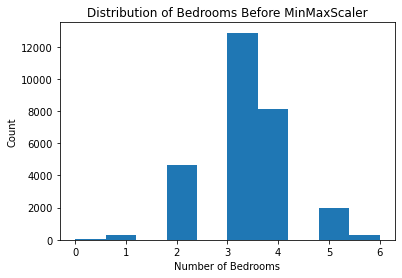

In [11]:
plt.hist(train.bedrooms)
plt.title('Distribution of Bedrooms Before MinMaxScaler')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

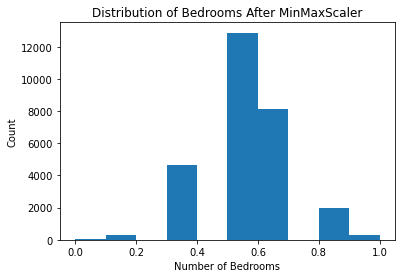

In [12]:
plt.hist(train_scaled.bedrooms)
plt.title('Distribution of Bedrooms After MinMaxScaler')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')

#### MinMax

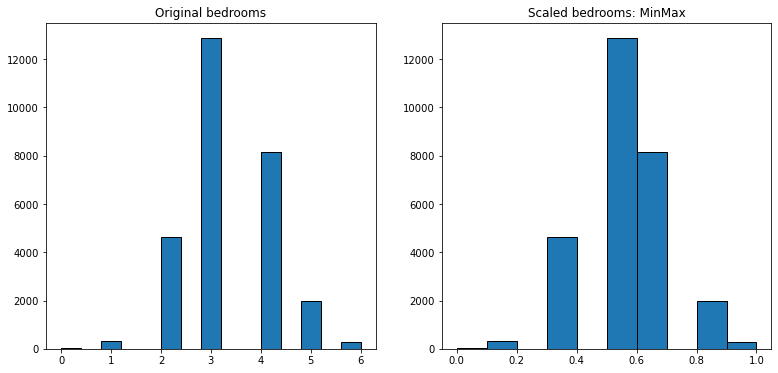

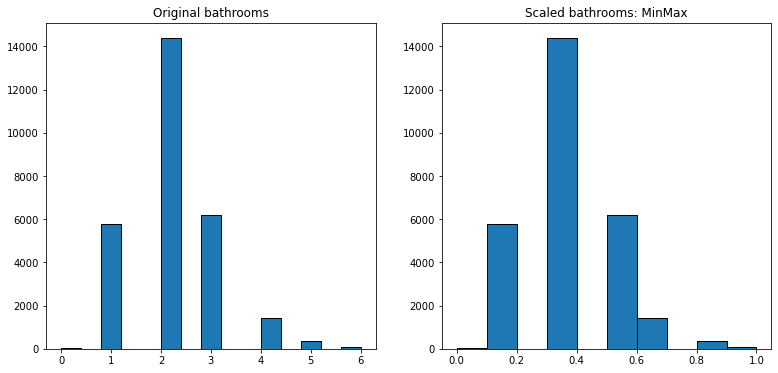

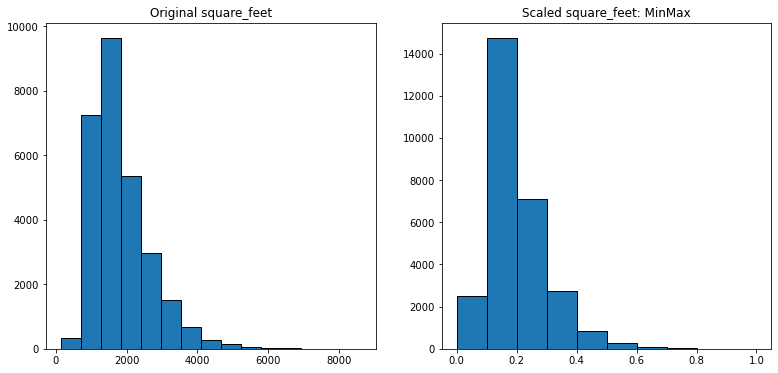

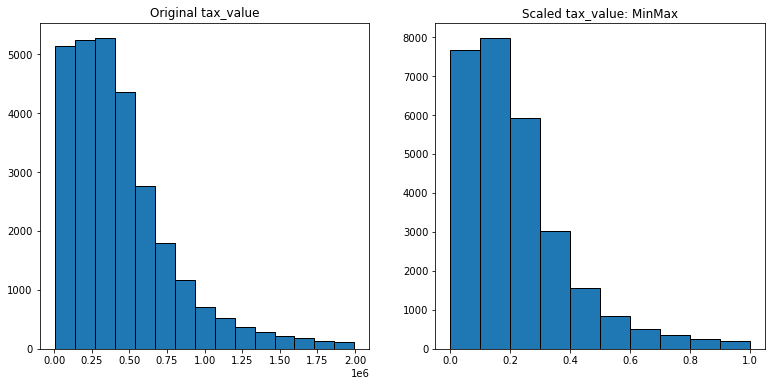

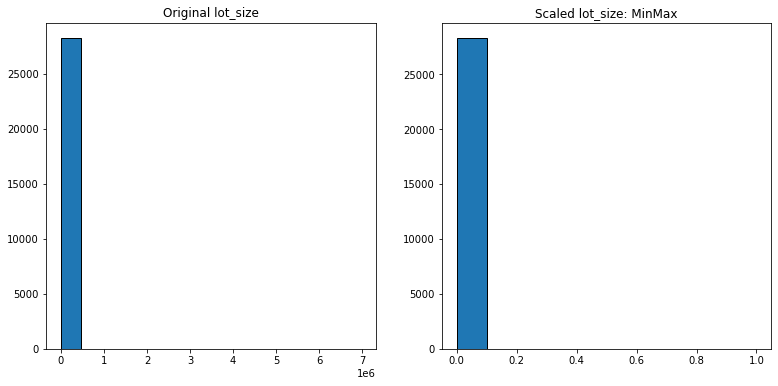

In [28]:
for col in cols_scaled:
    scaler = sklearn.preprocessing.MinMaxScaler()
    scaler.fit(train[[col]])
    train_scaled = scaler.transform(train[[col]])
    plt.figure(figsize=(13, 6))
    plt.subplot(121)
    plt.hist(train[col], bins=15, ec='black')
    plt.title(f'Original {col}')
    plt.subplot(122)
    plt.hist(train_scaled, bins=10, ec='black')
    plt.title(f'Scaled {col}: MinMax')
    plt.show()

#### Standard

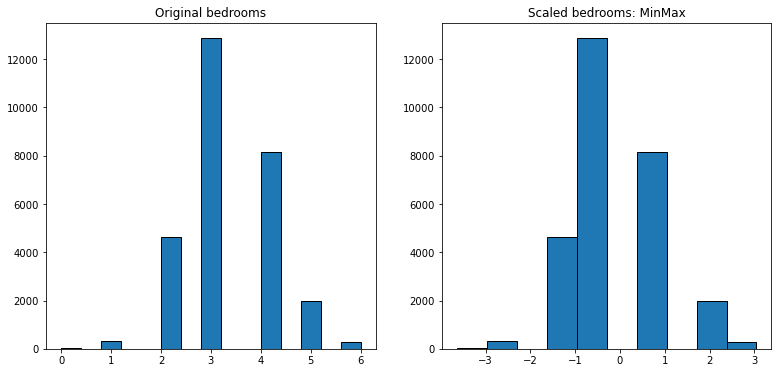

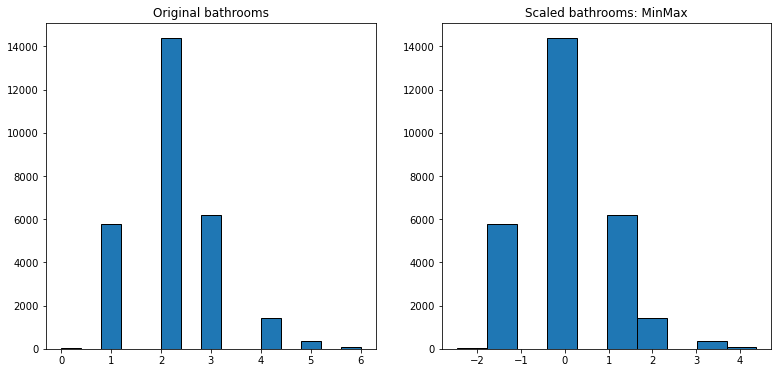

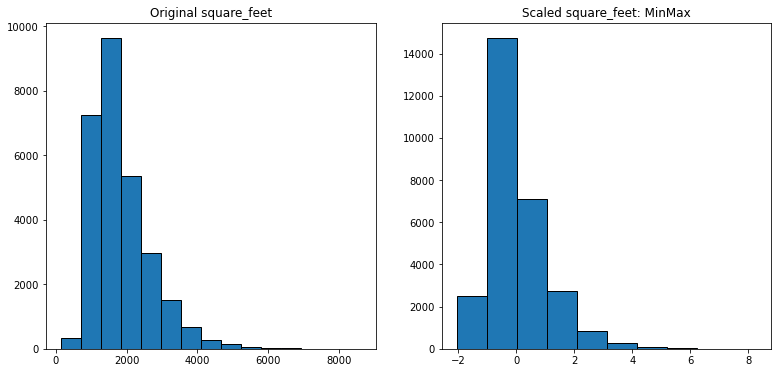

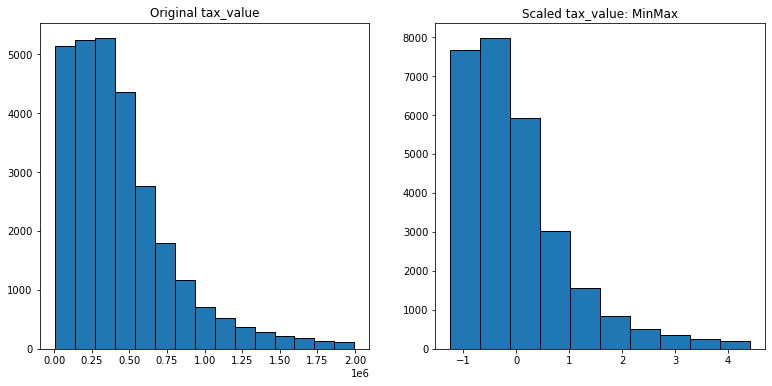

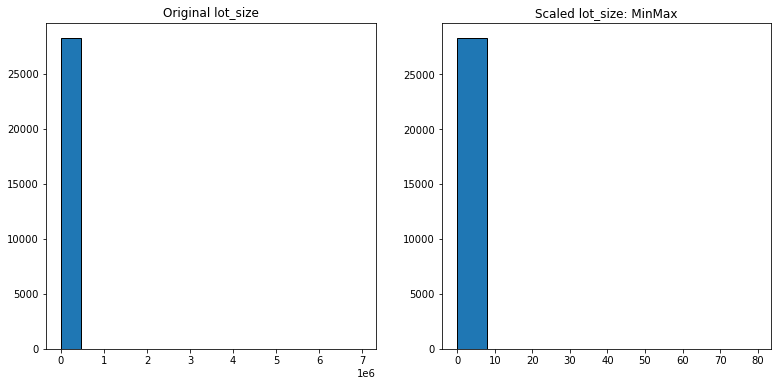

In [29]:
for col in cols_scaled:
    scaler = sklearn.preprocessing.StandardScaler()
    scaler.fit(train[[col]])
    train_scaled = scaler.transform(train[[col]])
    plt.figure(figsize=(13, 6))
    plt.subplot(121)
    plt.hist(train[col], bins=15, ec='black')
    plt.title(f'Original {col}')
    plt.subplot(122)
    plt.hist(train_scaled, bins=10, ec='black')
    plt.title(f'Scaled {col}: MinMax')
    plt.show()

#### Robust

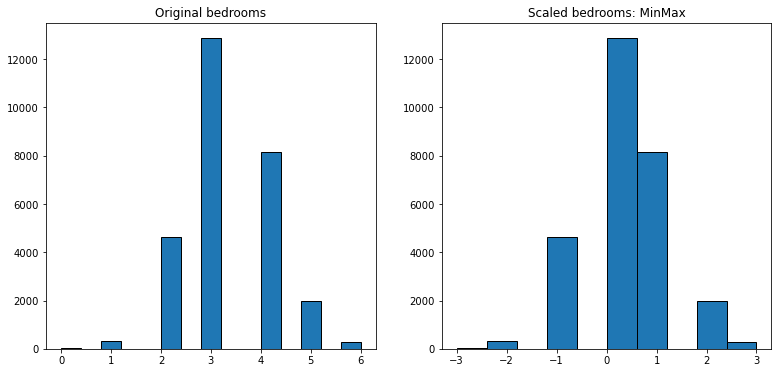

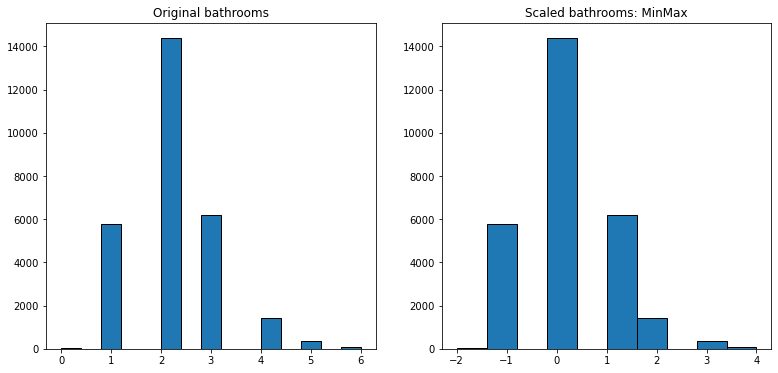

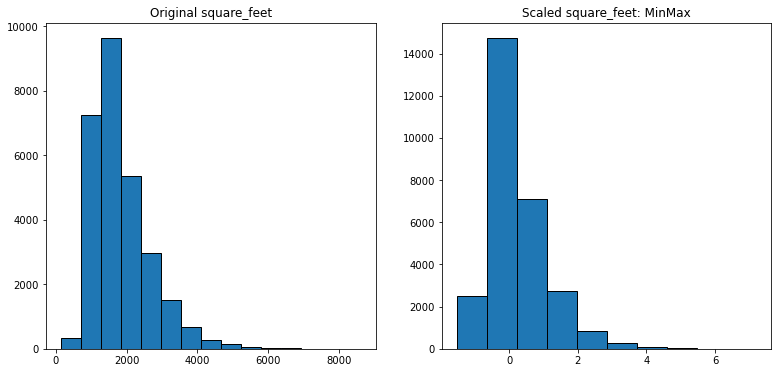

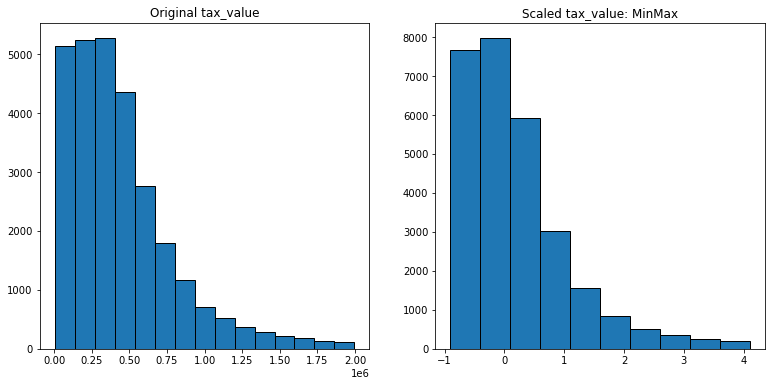

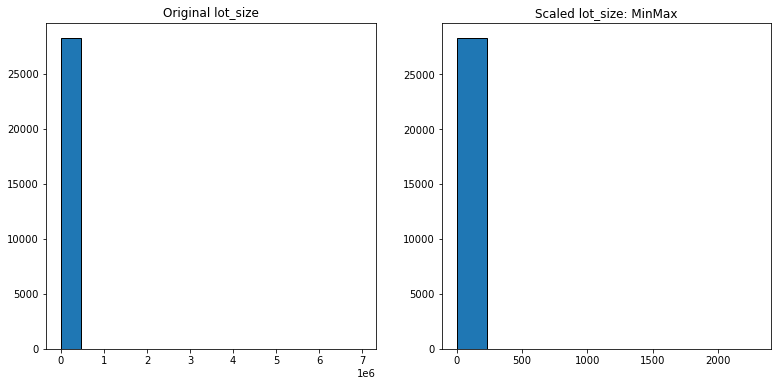

In [30]:
for col in cols_scaled:
    scaler = sklearn.preprocessing.RobustScaler()
    scaler.fit(train[[col]])
    train_scaled = scaler.transform(train[[col]])
    plt.figure(figsize=(13, 6))
    plt.subplot(121)
    plt.hist(train[col], bins=15, ec='black')
    plt.title(f'Original {col}')
    plt.subplot(122)
    plt.hist(train_scaled, bins=10, ec='black')
    plt.title(f'Scaled {col}: MinMax')
    plt.show()

2. Apply the `.inverse_transform` method to your scaled data. Is the resulting dataset the exact same as the original data?

In [17]:
scaler = MinMaxScaler()
original_data = train[['tax_value']]
scaled_data = scaler.fit_transform(original_data)

In [18]:
scaled_data

array([[0.1984414 ],
       [0.09040887],
       [0.30594055],
       ...,
       [0.09836995],
       [0.17097603],
       [0.13146518]])

In [19]:
original_data[:5]

,tax_value
parcel,
11038754,398737
13868645,183434
17278308,612977
12852432,241917
10729644,67256


In [20]:
scaler.inverse_transform(scaled_data)[:5]

array([[398737.],
       [183434.],
       [612977.],
       [241917.],
       [ 67256.]])

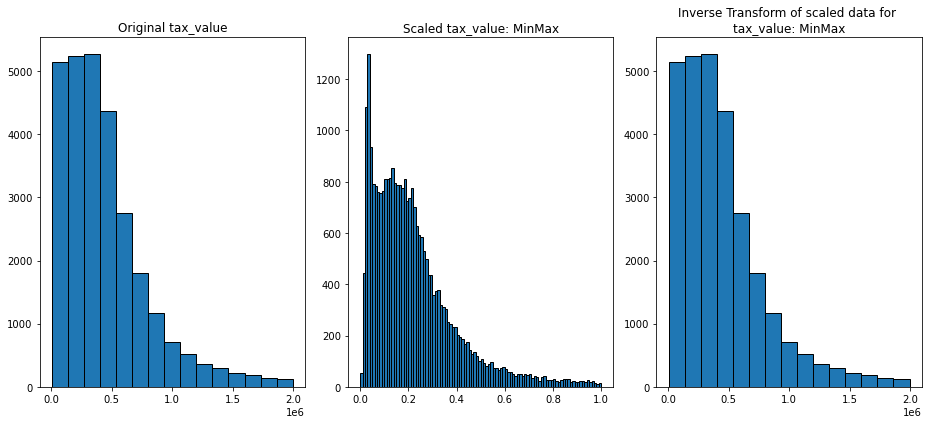

In [31]:
# for col in columns:
col = 'tax_value'
scaler = sklearn.preprocessing.MinMaxScaler()
scaler.fit(train[[col]])
train_scaled = scaler.transform(train[[col]])
inverse_train_scaled = scaler.inverse_transform(train_scaled)
plt.figure(figsize=(13, 6))
plt.subplot(131)
plt.hist(train[col], bins=15, ec='black')
plt.title(f'Original {col}')
plt.subplot(132)
plt.hist(train_scaled, bins=100, ec='black')
plt.title(f'Scaled {col}: MinMax')
plt.subplot(133)
plt.hist(inverse_train_scaled, bins=15, ec='black')
plt.title(f'Inverse Transform of scaled data for \n{col}: MinMax')
plt.tight_layout()
plt.show()

Read the documentation for sklearn's `QuantileTransformer`. Use `normal` for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [21]:
from sklearn.preprocessing import QuantileTransformer

4. Use the `QuantileTransformer`, but omit the output_distribution argument. Visualize your results. What do you notice?

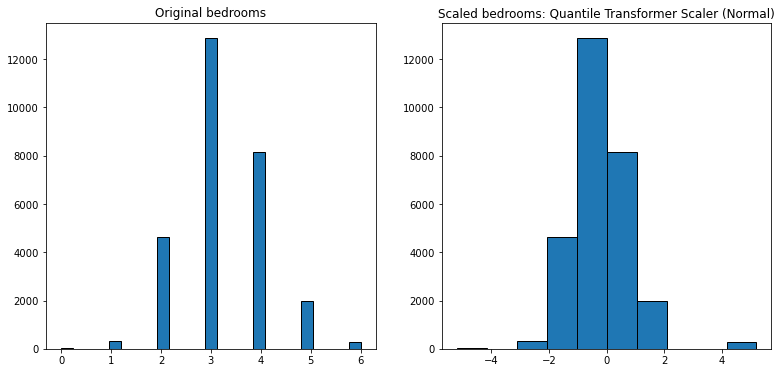

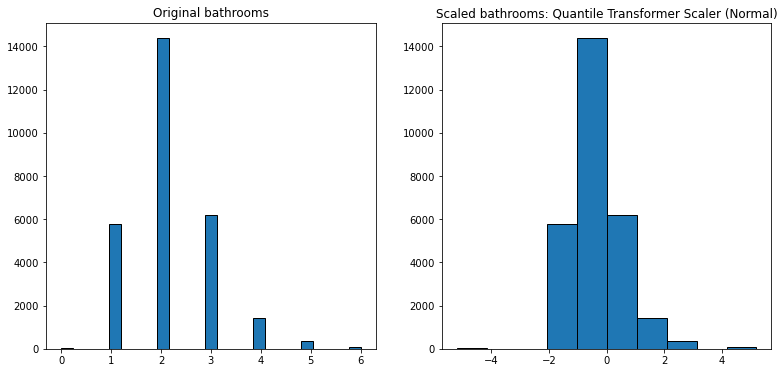

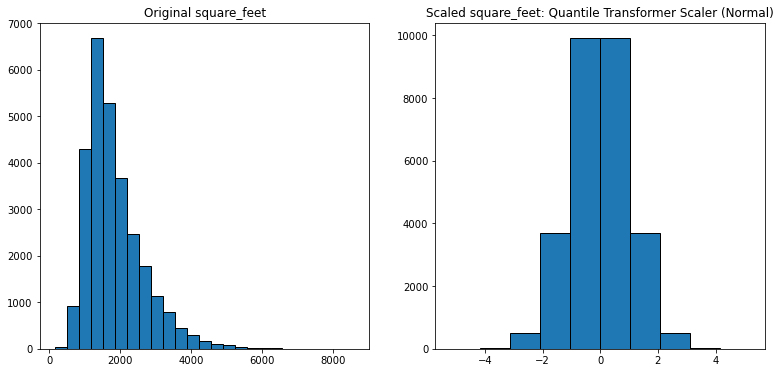

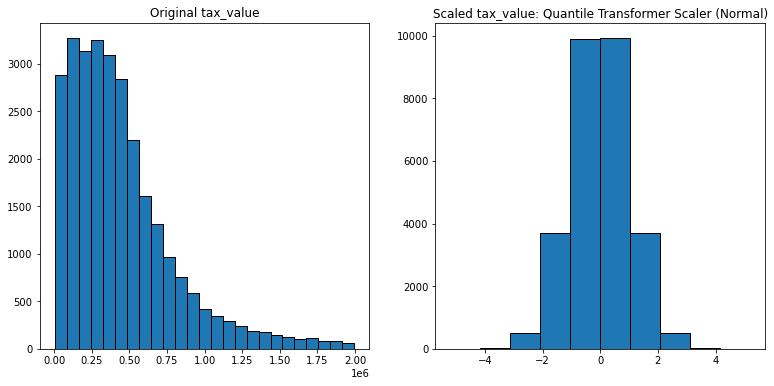

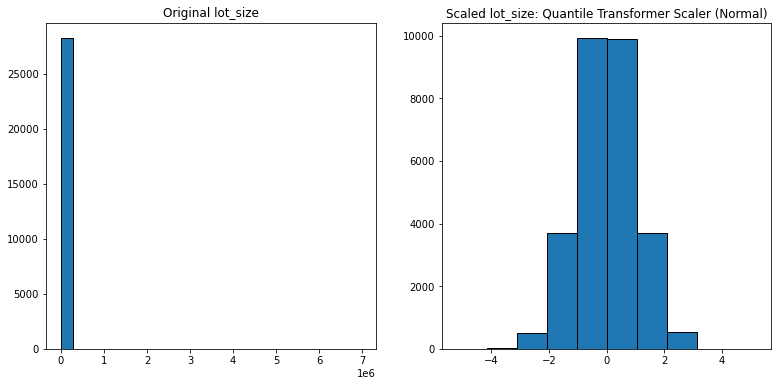

In [33]:
# QuantileTransformer Applied
for col in cols_scaled:
    scaler = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')
    scaler.fit(train[[col]])
    train_scaled = scaler.transform(train[[col]])
    plt.figure(figsize=(13, 6))
    plt.subplot(121)
    plt.hist(train[col], bins=25, ec='black')
    plt.title(f'Original {col}')
    plt.subplot(122)
    plt.hist(train_scaled, ec='black')
    plt.title(f'Scaled {col}: Quantile Transformer Scaler (Normal)')
    plt.show()

5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data

In [24]:
def scale_data(train, validate, test, features_to_scale, scaler_type):
    """Scales data using MinMax Scaler. 
    Accepts train, validate, and test datasets as inputs as well as a list of the features to scale. 
    Returns dataframe with scaled values added on as columns"""
    
    # Select which scaler to use
    if scaler_type == 'MinMax':
        scaler = sklearn.preprocessing.MinMaxScaler()
    elif scaler_type == 'Standard':
        scaler = sklearn.preprocessing.StandardScaler()
    elif scaler_type == 'Robust':
        scaler = sklearn.preprocessing.RobustScaler()
    else:
        print("Invalid scaler entry, using MinMax")
        scaler = sklearn.preprocessing.MinMaxScaler()
        
    # Fit the scaler to train data only.     
    scaler.fit(train[features_to_scale])
    
    # Generate a list of the new column names with _scaled added on
    scaled_columns = [col+"_scaled" for col in features_to_scale]
    
    # Transform the separate datasets using the scaler learned from train
    scaled_train = scaler.transform(train[features_to_scale])
    scaled_validate = scaler.transform(validate[features_to_scale])
    scaled_test = scaler.transform(test[features_to_scale])
    
    # Concatenate the scaled data to the original unscaled data
    train_scaled = pd.concat([train, pd.DataFrame(scaled_train,index=train.index, columns = scaled_columns)],axis=1).drop(columns = features_to_scale)
    validate_scaled = pd.concat([validate, pd.DataFrame(scaled_validate,index=validate.index, columns = scaled_columns)],axis=1).drop(columns = features_to_scale)
    test_scaled = pd.concat([test, pd.DataFrame(scaled_test,index=test.index, columns = scaled_columns)],axis=1).drop(columns = features_to_scale)
    
    
    return train_scaled, validate_scaled, test_scaled

In [25]:
train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test, features_to_scale = cols_scaled, scaler_type = 'MinMax')

In [26]:
train_scaled

,garage,pool,zip,year_built,tax_amount,fed_code,age,bedrooms_scaled,bathrooms_scaled,square_feet_scaled,tax_value_scaled,lot_size_scaled
parcel,,,,,,,,,,,,
11038754,0,0,96371,1952,4818.44,6037,65,0.333333,0.333333,0.125842,0.198441,0.001106
13868645,2,0,97039,1963,2333.40,6059,54,0.500000,0.333333,0.150656,0.090409,0.001133
17278308,2,0,96351,1993,6848.96,6111,24,0.666667,0.500000,0.392296,0.305941,0.002157
12852432,0,0,96492,1974,3254.93,6037,43,0.500000,0.333333,0.147465,0.119754,0.000920
10729644,0,1,96342,1959,929.64,6037,58,0.500000,0.333333,0.119934,0.032114,0.001067
...,...,...,...,...,...,...,...,...,...,...,...,...
12746457,0,0,96193,1950,886.29,6037,67,0.500000,0.166667,0.106345,0.018081,0.000683
12720771,0,0,96193,1949,8712.83,6037,68,0.333333,0.166667,0.085076,0.164119,0.000707
11199404,0,0,97328,1988,3397.59,6037,29,0.666667,0.500000,0.141085,0.098370,0.000610
